In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Converting text file into csv file

In [2]:
import json
import csv

def json_to_csv(txt_file, csv_file):

    lista = []
    with open(txt_file, 'r') as in_file:
        lines = in_file.readlines()
        for line in lines:
            try:
                dict_line = json.loads(line)
                lista.append(dict_line)
            except Exception as err:
                print(err)

    header = [
        "accountNumber","customerId","creditLimit","availableMoney","transactionDateTime","transactionAmount","merchantName",
        "acqCountry","merchantCountryCode","posEntryMode","posConditionCode","merchantCategoryCode","currentExpDate",
        "accountOpenDate","dateOfLastAddressChange","cardCVV","enteredCVV","cardLast4Digits","transactionType","echoBuffer",
        "currentBalance","merchantCity","merchantState","merchantZip","cardPresent","posOnPremises","recurringAuthInd","expirationDateKeyInMatch",
        "isFraud"
    ]
    with open(csv_file, 'w+') as out_file:
        dict_writer = csv.DictWriter(out_file, header)
        dict_writer.writeheader()
        dict_writer.writerows(lista)


In [6]:
json_to_csv('transactions.txt','transactions.csv')

In [2]:
data = pd.read_csv('transactions.csv')
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

We can see that coloumns 'echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','merchantName' have 0 non-null entries so we will drop these coloumns.

In [4]:
data = data.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','merchantName'],axis=1)
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,US,US,2.0,1.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,US,US,2.0,1.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [18]:
#Different categories of all categorical variables.

In [5]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

transactionDateTime
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']
acqCountry
['US' nan 'CAN' 'MEX' 'PR']
merchantCountryCode
['US' 'CAN' nan 'PR' 'MEX']
merchantCategoryCode
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
currentExpDate
['06/2023' '02/2024' '08/2025' '10/2029' '01/2020' '05/2020' '01/2021'
 '08/2032' '04/2020' '05/2023' '08/2024' '12/2031' '09/2027' '08/2022'
 '11/2027' '08/2028' '09/2032' '10/2028' '12/2021' '06/2033' '12/2019'
 '03/2024' '10/2024' '03/2021' '11/2026' '10/2032' '09/2030' '04/2023'
 '10/2031' '09/2021' '06/2032' '10/2021' '09/2031' '05/2029' '07/2020'
 '05/2024' '04/2030' '03/2022' '12/2030' '04/2026' '06/2021' '12/2028'
 '11/2030' '04/2029' '03/2032' '09/2024' '06/2031' '

In [19]:
#Dropping rows with null values

In [6]:
data = data.dropna()

In [7]:
data['transactionDateTime'] = data['transactionDateTime'].str.replace('T',' ')
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,US,US,2.0,1.0,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,US,US,9.0,1.0,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,US,US,2.0,1.0,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


Converting 'transactionDateTime','currentExpDate', 'accountOpenDate','dateOfLastAddressChange' to int data type

In [8]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime']).astype(np.int64)
data['currentExpDate'] = pd.to_datetime(data['currentExpDate']).astype(np.int64)
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate']).astype(np.int64)
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange']).astype(np.int64)
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,1471098452000000000,98.55,US,US,2.0,1.0,...,1426291200000000000,1426291200000000000,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,1476162354000000000,74.51,US,US,9.0,1.0,...,1426291200000000000,1426291200000000000,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,1478596719000000000,7.47,US,US,9.0,1.0,...,1426291200000000000,1426291200000000000,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,1481336090000000000,7.47,US,US,9.0,1.0,...,1426291200000000000,1426291200000000000,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,1458853486000000000,71.18,US,US,2.0,1.0,...,1438819200000000000,1438819200000000000,885,885,3143,PURCHASE,0.0,True,False,False


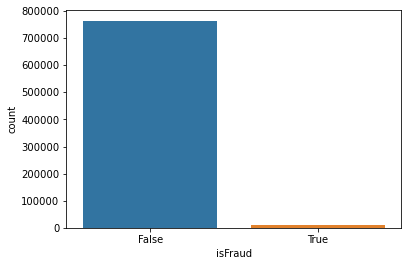

In [12]:
sns.countplot(x='isFraud',data=data)
plt.show()

Dataset is highly imbalanced

### Exploring categorical features

In [21]:
cat_data = data[['acqCountry','merchantCountryCode','transactionType','expirationDateKeyInMatch','cardPresent']].copy()

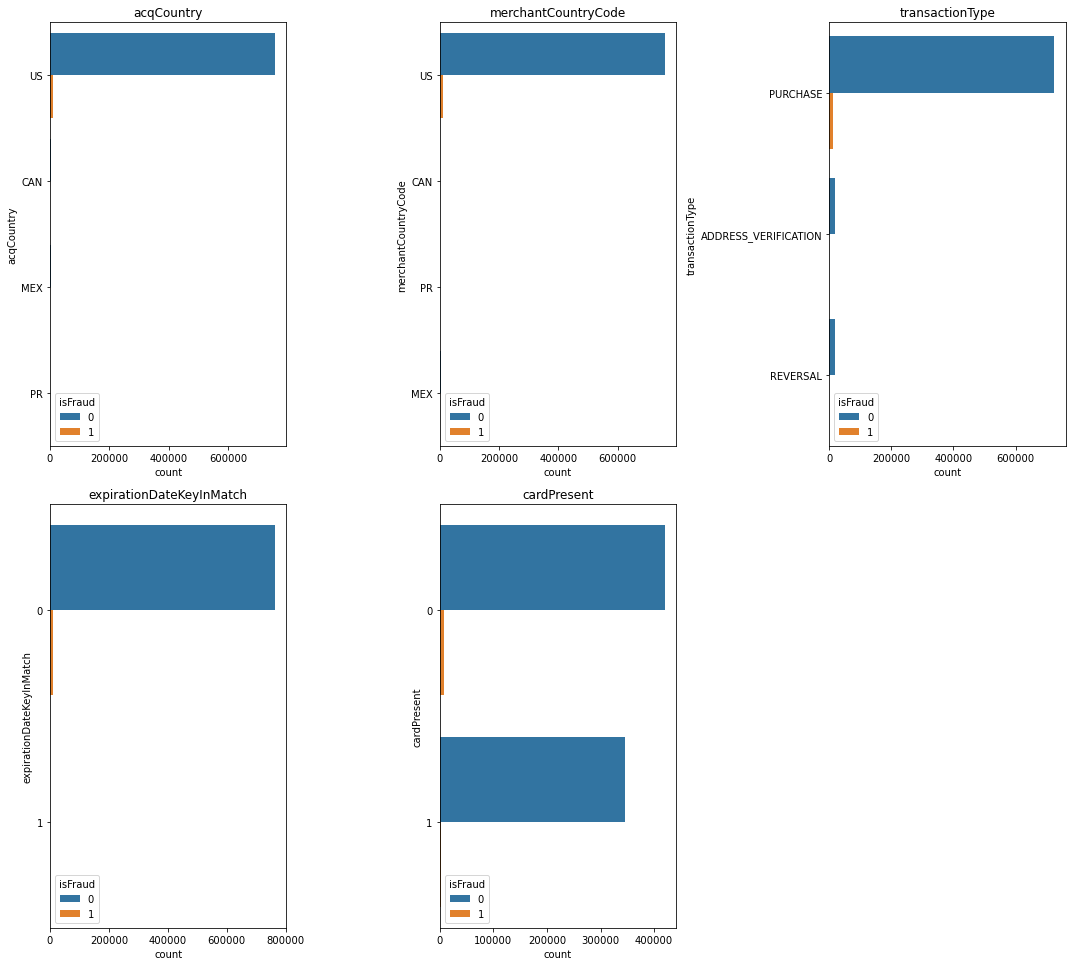

In [22]:
plt.figure(figsize=(15,80))
plotnumber=1
for i, predictor in enumerate(cat_data):
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(data=data, y=predictor, hue='isFraud')
    plt.title(predictor)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### From the above plots we can observe that:

- Most of the fraud cases are reported from USA
- Most of the fraud cases are reported when transaction type is 'Purchase'
- In most of the fraud cases the card is not present.

In [23]:
#Handling categorical variables

In [9]:
data['cardPresent'] = data['cardPresent'].astype(np.int64)
data['expirationDateKeyInMatch'] = data['expirationDateKeyInMatch'].astype(np.int64)
data['isFraud'] = data['isFraud'].astype(np.int64)

In [10]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,posEntryMode,posConditionCode,currentExpDate,accountOpenDate,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,737265056,737265056,5000.0,5000.0,1471098452000000000,98.55,2.0,1.0,1685577600000000000,1426291200000000000,...,0,0,0,0,0,1,0,0,1,0
1,737265056,737265056,5000.0,5000.0,1476162354000000000,74.51,9.0,1.0,1706745600000000000,1426291200000000000,...,0,0,0,0,0,0,0,0,1,0
2,737265056,737265056,5000.0,5000.0,1478596719000000000,7.47,9.0,1.0,1754006400000000000,1426291200000000000,...,1,0,0,0,0,0,0,0,1,0
3,737265056,737265056,5000.0,5000.0,1481336090000000000,7.47,9.0,1.0,1754006400000000000,1426291200000000000,...,1,0,0,0,0,0,0,0,1,0
4,830329091,830329091,5000.0,5000.0,1458853486000000000,71.18,2.0,1.0,1885507200000000000,1438819200000000000,...,0,0,0,0,0,0,0,0,1,0


Plotting correlation matrix

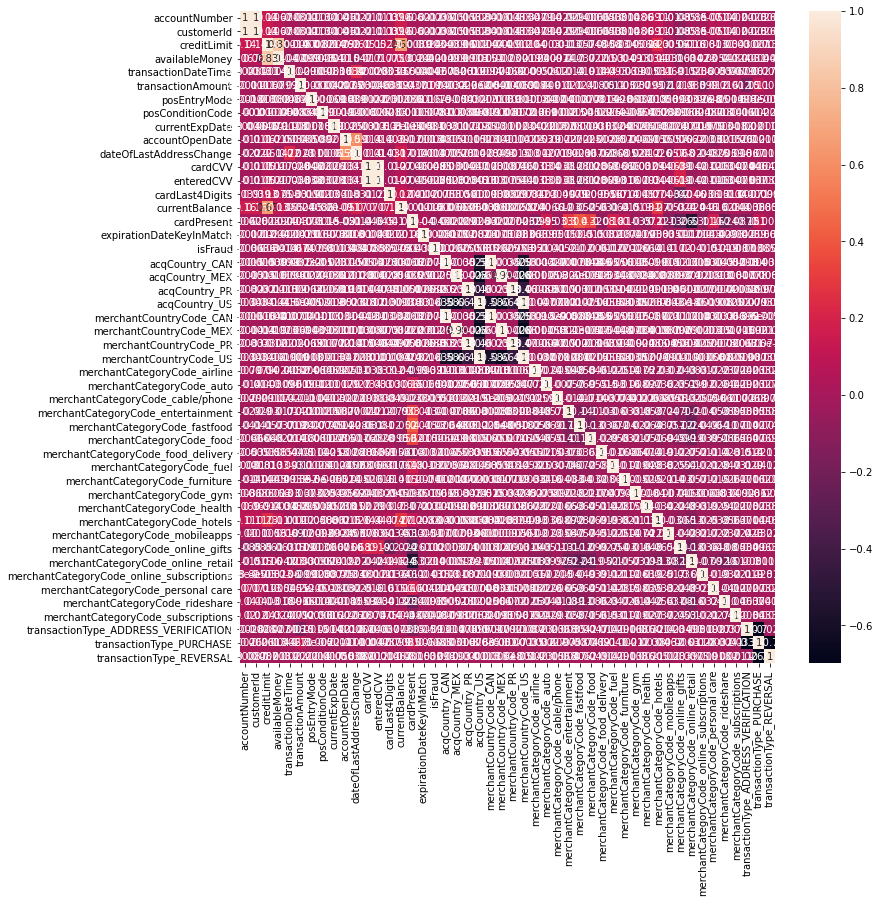

In [18]:
## Checking for correlation
cor_mat=data_dummies.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(cor_mat,annot=True)

In [11]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [12]:
target = data_dummies['isFraud']
data_dummies = data_dummies.drop(['isFraud'],axis=1)

From the Countplot of both the classes we can see that the dataset is highly imbalanced so we will use 'SMOTE' for balancing our dataset

In [15]:
sm = SMOTE()
X_train_res, Y_train_res = sm.fit_resample(data_dummies, target)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (1529404, 47)
After OverSampling, the shape of train_y: (1529404,) 

After OverSampling, counts of label '1': 764702
After OverSampling, counts of label '0': 764702


In [24]:
#Splitting our dataset into train and test.

In [16]:
X_train,x_test,Y_train,y_test = train_test_split(X_train_res,Y_train_res,test_size=0.3)

#### Random Forest Classifier

Results on training data:

Accuracy = 0.9999971977858773
Precision = 0.999997197801605
Recall = 0.9999971977858773

Results on testing data:

Accuracy = 0.9909158671554547
Precision = 0.9909829124994333
Recall = 0.9909158671554547


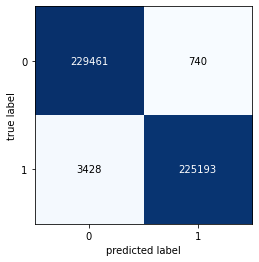

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_2 = rfc.predict(x_test)
pred_tr_2 = rfc.predict(X_train)
conf_matrix = confusion_matrix(y_test,pred_2)
plot_confusion_matrix(conf_matrix)

precision = precision_score(y_test,pred_2,average='weighted')
recall = recall_score(y_test, pred_2,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(Y_train, pred_tr_2)))
print("Precision = "+str(precision_score(Y_train,pred_tr_2,average='weighted')))
print("Recall = "+str(recall_score(Y_train,pred_tr_2,average='weighted')))

print()

print("Results on testing data:\n")
print("Accuracy = "+str(accuracy_score(y_test, pred_2)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))

Through Random Forest Classifier we are able to get 99% accuracy on both training and test data.